✍ В двух предыдущих юнитах мы познакомились с основными внутренними и внешними мерами, с помощью которых можно оценивать качество кластеризации. В этом юните мы попрактикуемся в решении задач кластеризации и используем полученные знания, чтобы оценить результаты.

Мы будем использовать данные, взятые с датчиков акселерометров и гироскопов смартфонов Samsung Galaxy S3. Телефоны носили в кармане добровольцы в возрасте от 19 до 49 лет. Смартфоны постоянно фиксировали значения ускорения и скорости по трём измерениям, а поведение людей записывали на видео, чтобы вручную отметить, какую физическую активность осуществлял человек в тот или иной момент.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

Данные содержат следующие признаки:

+ различные показатели с акселерометра и гироскопа;
+ метка активности (физическая активность человека в конкретный момент).

Попробуем на основе данных с гироскопа и акселерометра разделить активности людей на некоторые схожие по своим характеристикам группы. В идеале наблюдения во время ходьбы должны попасть в один кластер, наблюдения во время подъёма по лестнице — в другой и т. д.

## Задание 4.1

Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

Какая размерность получилась у набора данных с признаками?

In [2]:
X_train = np.loadtxt("data/train.txt")
y_train = np.loadtxt("data/train_labels.txt")
 
X_test = np.loadtxt("data/test.txt")
y_test = np.loadtxt("data/test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

## Задание 4.2

Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [3]:
len(np.unique(y))

6

Как видите, есть ряд активностей, обозначенных цифрами. Эти метки означают следующее:

+ 1 — ходьба;
+ 2 — подъём;
+ 3 — спуск;
+ 4 — сидение;
+ 5 — стояние;
+ 6 — лежание.

## Задание 4.3

Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.

In [4]:
from sklearn.preprocessing import StandardScaler

#определяем скейлер
scaler = StandardScaler()
#масштабируем данные
X_scaled = scaler.fit_transform(X)
#выводим нужное значение
X_scaled[0][0]

0.2105338541767611

## Задание 4.4

Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

#проходимся циклом по всем нужным нам значениям количества кластеров
for i in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
	#предсказываем метки
    y_pred = km.labels_
	#выводим результат для коэффициента силуэта
    print (i, metrics.silhouette_score(X_scaled,  y_pred))
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred= km.labels_
    print (i, metrics.calinski_harabasz_score(X_scaled,y_pred))
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred = km.labels_
    print (i, metrics.davies_bouldin_score(X_scaled, y_pred))

2 0.3937324764077081
3 0.31548375272734164
4 0.15052911849826184
5 0.12723671885995455
6 0.11096892121098482
7 0.08541910378666204
8 0.07618332955957029
9 0.07648837092046107
2 7880.813903657111
3 5034.4752572242
4 3696.3381978005555
5 3027.0761722557045
6 2556.7735736855657
7 2216.563937360621
8 1974.9714963243528
9 1790.9531728187399
2 1.0707441822385657
3 1.786516465365282
4 2.3409301040454653
5 2.431375173184107
6 2.367036374724895
7 2.6819795075319037
8 2.611225993977313
9 2.581888277475603


Возможно, вам покажется удивительным, что все три меры единодушно показали такое расхождение с реальным разделением на кластеры. Однако это совершенно не значит, что они показывают неверные значения или что алгоритмы кластеризации работают некорректно. Возможно, такое разделение на другое количество кластеров можно объяснить — вы сами увидите это позднее.

## Задание 4.5

Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Параметр random_state = 42. В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя.

In [6]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import adjusted_rand_score

#определяем модель k-means
model= KMeans(n_clusters=6, init='random', random_state=42)
#обучаем модель
model.fit(X_scaled)
#вычисляем значение однородности
print(homogeneity_score(y, model.labels_))
#вычисляем значение полноты
print(completeness_score(y, model.labels_))
#вычисляем значение скорректированного индекса Рэнда
print(adjusted_rand_score(y, model.labels_))

0.5404114294595578
0.5809491951515007
0.4196031125923396


## Задание 4.6

Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

In [7]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, model.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
             'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
print(ct)

            1     2     3    4    5    6
ходьба      0     0   903   78  741    0
подъём      0     0  1242    5  295    2
спуск       0     0   321  196  889    0
сидение    91  1238     1    0    0  447
стояние     0  1346     0    0    0  560
лежание  1556    54     5    0    0  329


## Задание 4.7

Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1.

In [8]:
km = KMeans(n_clusters = 2 , random_state = 42 ).fit(X_scaled)

ctbl = pd.crosstab(y, km.labels_)
ctbl.index = ['ходьба', 'подъём', 
                'спуск', 'сидение', 'стояние', 'лежание']
ctbl.columns = list(range(1,3))
print(ctbl)

            1     2
ходьба   1722     0
подъём   1536     8
спуск    1406     0
сидение     3  1774
стояние     0  1906
лежание    12  1932


## Задание 4.8

Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [9]:
metrics.completeness_score(y, km.labels_)

0.979530559699631

## Задание 4.9

Как можно интерпретировать полученное значение полноты?

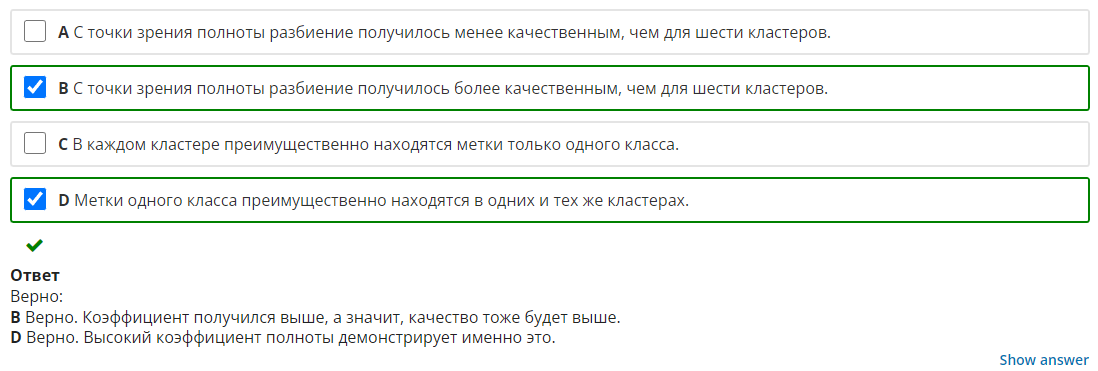

## Задание 4.10

Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.

In [10]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
print("Completeness: %0.3f" % metrics.completeness_score(y, ag.labels_))

Completeness: 1.000


⭐ В этом юните мы потренировались в решении задачи кластеризации. Мы смогли сравнить два алгоритма с точки зрения внешних мер, а также увидеть, что расхождение показателей внутренних мер с предполагаемым разделением на кластеры не всегда говорит о плохо реализованных алгоритмах кластеризации: несмотря на то что наши алгоритмы предложили разделение на два кластера, а не на шесть, оно было обосновано наблюдаемыми признаками и содержательно интерпретировалось. Поэтому, даже если у вас есть разметка и вы можете пользоваться внешними мерами, советуем не пренебрегать внутренними, так как это поможет лучше узнать ваши данные.

В следующих юнитах мы познакомимся с алгоритмами снижения размерности. После этого предлагаем вам вернуться к данной задаче и попробовать улучшить качество кластеризации, уменьшив количество признаков.